In [1]:
# author     : Enes Çavuş
# date       : July 2021
# subject    : Data Preprocessing and Applying SVM-LR-DecisionTree-RandomForest Machine Lerning Algorithms

---
- Aiming to understand SVM - LR - Random Forest Machine Learning Models
- Manipulationn of data
---

In [2]:
# common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

# sklearn machine learning models and preprocessing modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split

In [3]:
# data import - load
wine = pd.read_csv("datasets/winequality-white.csv", sep=';')
wine = shuffle(wine)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1004,5.8,0.36,0.26,3.3,0.038,40.0,153.0,0.99110,3.34,0.55,11.3,6
2325,7.0,0.35,0.17,1.1,0.049,7.0,119.0,0.99297,3.13,0.36,9.7,6
3406,5.6,0.32,0.33,7.4,0.037,25.0,95.0,0.99268,3.25,0.49,11.1,6
823,6.7,0.19,0.23,6.2,0.047,36.0,117.0,0.99450,3.34,0.43,9.6,6
4450,6.9,0.29,0.25,12.2,0.040,29.0,136.0,0.99552,3.05,0.65,10.4,6


In [4]:
# quality range
qualities = wine["quality"].unique()
sorted(qualities) # 7,8,9 high quality = 1 ----------- 3,4,5,6 low quality 0

[3, 4, 5, 6, 7, 8, 9]

In [5]:
# binning qualities to make this machine learning process easier
bin_wine = wine.copy()
bin_wine.quality = bin_wine.quality.replace([7,8,9],1)
bin_wine.quality = bin_wine.quality.replace([3,4,5,6],0)
qualities = bin_wine["quality"].unique()
sorted(qualities)

[0, 1]

In [6]:
# getting data ready to machine learning concets - this notebook focusing on ml algorithms not on preprocessing
X = bin_wine.drop("quality", axis=1)
y = bin_wine["quality"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

              precision    recall  f1-score   support

           0       0.79      1.00      0.89       778
           1       0.00      0.00      0.00       202

    accuracy                           0.79       980
   macro avg       0.40      0.50      0.44       980
weighted avg       0.63      0.79      0.70       980



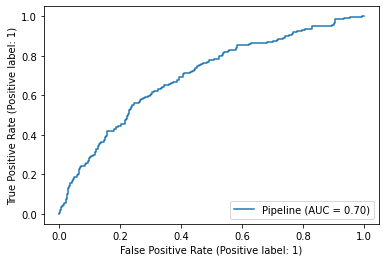

In [7]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1,loss='hinge'))
])

svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
print(classification_report(y_test, pred))
plot_roc_curve(svm_clf, X_test, y_test)

84.48979591836735
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       778
           1       0.66      0.50      0.57       202

    accuracy                           0.84       980
   macro avg       0.77      0.72      0.74       980
weighted avg       0.83      0.84      0.84       980



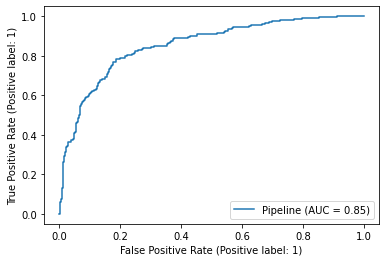

In [8]:
# SVC 
svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(C=10,kernel='rbf'))
])

svc.fit(X_train, y_train)
pred = svc.predict(X_test)
acc = svc.score(X_test,y_test) * 100
print(acc)
print(classification_report(y_test, pred))
plot_roc_curve(svc, X_test, y_test)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


In [11]:
# making ml process automated - gettign ready 4 different algorithms at once
pipe_lr = Pipeline([('scaler', StandardScaler()),
                ('clf', LogisticRegression(random_state=42))])

pipe_dt = Pipeline([('scaler', StandardScaler()),
                 ('model', DecisionTreeClassifier(random_state=42))])

pipe_rf = Pipeline([('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(random_state=42))])


pipe_svm = Pipeline([('scaler', StandardScaler()),
            ('clf', svm.SVC(random_state=42))])

In [12]:
# Set grid search params
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
        'clf__C': param_range}]

# Construct grid searches
jobs = -1

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='accuracy',
            cv=10) 

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)

SVM = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)

# List of pipelines for iterating through each of them
grids = [LR,RF,SVM]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest',
        2: 'Support Vector Machine'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params are : {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.798
Test set accuracy score for best params: 0.806 

Estimator: Random Forest
Best params are : {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_split': 10}
Best training accuracy: 0.852
Test set accuracy score for best params: 0.858 

Estimator: Support Vector Machine
Best params are : {'clf__C': 10, 'clf__kernel': 'rbf'}
Best training accuracy: 0.834
Test set accuracy score for best params: 0.845 

Classifier with best test set accuracy: Random Forest


In [13]:
best_gs

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'clf__criterion': ['gini', 'entropy'],
                          'clf__max_depth': [9, 10],
                          'clf__min_samples_split': [10]}],
             scoring='accuracy')

In [14]:
# last training with best model and parameters

bestModel = best_gs
bestModel.fit(X_train, y_train)
pred = bestModel.predict(X_test)
acc = bestModel.score(X_test,y_test) * 100
print(acc)
print(classification_report(y_test, pred))

85.81632653061224
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       778
           1       0.71      0.53      0.61       202

    accuracy                           0.86       980
   macro avg       0.80      0.74      0.76       980
weighted avg       0.85      0.86      0.85       980



In [15]:
# trying some extras with SVC polynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
# SVC 
svc = Pipeline([
    ('poly_trans',PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('svc', SVC(C=10,kernel='rbf'))
])

svc.fit(X_train, y_train)
pred = svc.predict(X_test)
acc = svc.score(X_test,y_test) * 100
print(acc)
print(classification_report(y_test, pred))

83.46938775510205
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       778
           1       0.64      0.46      0.53       202

    accuracy                           0.83       980
   macro avg       0.75      0.70      0.72       980
weighted avg       0.82      0.83      0.82       980



___ENES ÇAVUŞ - ML PRACTICES - SVM - LR - Decision Tree - Random Forest___